# Minicurso de Power BI com Karine Lago

https://ead.databinteligencia.com.br/

In [2]:
#importando bibliotecas
import pandas as pd

In [2]:
#abrindo as bases de dados
clientes = pd.read_excel('Dados/Clientes.xlsx')
pedidos = pd.read_excel('Dados/Pedidos.xlsx')
vendedores = pd.read_csv(r'Dados/Vendedores.txt', encoding='utf8', skiprows=4, sep='\t')

In [3]:
#pre-visualizando os dados
data_raw = [clientes, pedidos, vendedores]

for dataset in data_raw:
    display(dataset.sample(2))

,Cod Cliente,Cliente,UF,Cidade,Região
1256,13182,Maria Ferreira Martins,BA,SALVADOR,NE
1268,13312,Julieta Barbosa Castro,MG,TIMOTEO,SU


,Data,NF,Categoria Produto,Grupo Produto,Cliente,Vendedor,Quantidade,Valor Total
3749,2019-11-19,29660,Camping e Pesca,Aventura,6602,80510,2.0,102.0
4282,2019-11-26,30267,Radicais,Aventura,9442,80511,1.0,151.7


,Cod Vendedor,Vendedor
1,80502,Paulo Santos
9,80510,Mateus Oliveira


In [4]:
#analise dadas colunas de dados
for dataset in data_raw:
    print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cod Cliente  1777 non-null   int64 
 1   Cliente      1777 non-null   object
 2   UF           1777 non-null   object
 3   Cidade       1777 non-null   object
 4   Região       1777 non-null   object
dtypes: int64(1), object(4)
memory usage: 69.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80619 entries, 0 to 80618
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Data               80619 non-null  datetime64[ns]
 1   NF                 80619 non-null  int64         
 2   Categoria Produto  80619 non-null  object        
 3   Grupo Produto      80619 non-null  object        
 4   Cliente            80619 non-null  int64         
 5   Vendedor           80619 non-null  int64         
 6 

## Análise gráfica básica

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

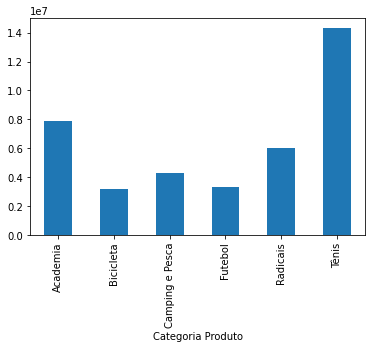

In [6]:

fig, ax = plt.subplots()
pedidos.groupby(pedidos['Categoria Produto'])['Valor Total'].sum().plot.bar()
plt.show()

In [7]:
#Analise da Quantidade e Valor Total por categorias
format_mapping = {'Quantidade': '{:,.0f}', 'Valor Total': 'R$ {:,.2f}'}
rect = pedidos.groupby(pedidos['Categoria Produto'])[['Quantidade', 'Valor Total']].sum()
rect.style.format(format_mapping)

,Quantidade,Valor Total
Categoria Produto,,
Academia,"122,125","R$ 7,890,128.61"
Bicicleta,"3,780","R$ 3,195,950.01"
Camping e Pesca,"92,961","R$ 4,303,323.94"
Futebol,"34,063","R$ 3,307,253.07"
Radicais,"50,092","R$ 6,046,818.16"
Tênis,"37,670","R$ 14,298,740.54"


In [8]:
print(f'Valor Total: R$ {pedidos["Valor Total"].sum():,.2f} reais')

Valor Total: R$ 39,042,214.33 reais


In [9]:
print(f'Valor Médio Total: R$ {pedidos["Valor Total"].mean():,.2f} reais')

Valor Médio Total: R$ 484.42 reais


In [10]:
print(f'Valor Máximo: R$ {pedidos["Valor Total"].max():,.2f} reais')

Valor Máximo: R$ 75,000.00 reais


In [11]:
print(f'Quantidade Total: {pedidos["Quantidade"].sum():,.0f} unidades')

Quantidade Total: 340,691 unidades


In [12]:
print(f'Quantidade total de clientes: {pedidos["Cliente"].nunique():,.0f} clientes')

Quantidade total de clientes: 1,611 clientes


<AxesSubplot:xlabel='Data'>

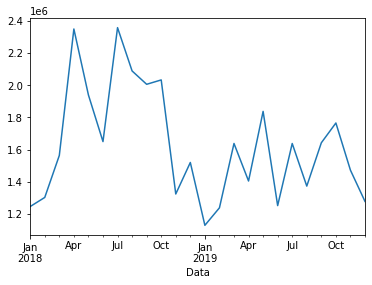

In [13]:
pedidos.groupby(pd.Grouper(key='Data', freq='M'))['Valor Total'].sum().plot.line()

## Relacionamento de tabelas

In [14]:
#Quantidade de vendas por vendedor
dataset = pedidos.set_index('Vendedor').join(vendedores.set_index('Cod Vendedor'), how='left')
dataset = dataset.groupby('Vendedor')['Quantidade', 'Valor Total'].sum()
dataset.style.format(format_mapping)

<ipython-input-14-3f35ac4c5365>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset = dataset.groupby('Vendedor')['Quantidade', 'Valor Total'].sum()


,Quantidade,Valor Total
Vendedor,,
Ana Vilela,"11,116","R$ 4,007,574.93"
Breno Azevedo,"21,679","R$ 1,659,997.03"
Carlos Silva,"16,314","R$ 1,920,110.56"
Clara Oliveira,"22,533","R$ 2,382,948.46"
Daniel Gomes,"19,978","R$ 2,122,921.41"
Douglas Domingues,"27,143","R$ 3,299,849.16"
João Cavalcanti,"15,477","R$ 2,042,149.01"
Julia Santos,"37,901","R$ 4,920,259.59"
Marcelo Souza,"13,295","R$ 3,088,053.67"


In [15]:
#Quantidade de vendas por vendedor por categoria
dataset = pedidos.set_index('Vendedor').join(vendedores.set_index('Cod Vendedor'), how='left')
print(dataset.groupby(['Vendedor', 'Categoria Produto'])['Quantidade'].sum())

Vendedor     Categoria Produto
Ana Vilela   Academia             1002.0
             Bicicleta             732.0
             Camping e Pesca       476.0
             Futebol               139.0
             Radicais              149.0
                                   ...  
Tiago César  Bicicleta              22.0
             Camping e Pesca      4859.0
             Futebol              2673.0
             Radicais             8884.0
             Tênis                4027.0
Name: Quantidade, Length: 78, dtype: float64


In [16]:
dataset.groupby(['Vendedor', 'Categoria Produto'])['Quantidade'].sum()

Vendedor     Categoria Produto
Ana Vilela   Academia             1002.0
             Bicicleta             732.0
             Camping e Pesca       476.0
             Futebol               139.0
             Radicais              149.0
                                   ...  
Tiago César  Bicicleta              22.0
             Camping e Pesca      4859.0
             Futebol              2673.0
             Radicais             8884.0
             Tênis                4027.0
Name: Quantidade, Length: 78, dtype: float64

In [17]:
dataset.groupby(['Vendedor', 'Categoria Produto'],as_index = False)['Quantidade'].sum().pivot('Vendedor', 'Categoria Produto')

Quantidade                                             \
Categoria Produto   Academia Bicicleta Camping e Pesca Futebol Radicais   
Vendedor                                                                  
Ana Vilela            1002.0     732.0           476.0   139.0    149.0   
Breno Azevedo         3600.0      88.0          5646.0  7181.0   4174.0   
Carlos Silva          5860.0      15.0          1929.0  1515.0   5219.0   
Clara Oliveira        9782.0     564.0          4183.0  3149.0   3814.0   
Daniel Gomes          9450.0     595.0          5691.0   982.0   2382.0   
Douglas Domingues    19409.0     328.0          1890.0   757.0    123.0   
João Cavalcanti       6432.0     114.0          3484.0  2152.0   1455.0   
Julia Santos         11737.0     248.0         12676.0  3825.0   5966.0   
Marcelo Souza         4846.0     923.0           891.0  1475.0   1140.0   
Mateus Oliveira      22641.0       8.0          3355.0   747.0    823.0   
Paulo Santos          7974.0      93.0         10802.0  3058.0  11331.0   
Rodrigo Gomes         7321.0      50.0         37079.0  6410.0   4632.0   
Tiago César          12071.0      22.0          4859.0  2673.0   8884.0   

                           
Categoria Produto   Tênis  
Vendedor                   
Ana Vilela         8618.0  
Breno Azevedo       990.0  
Carlos Silva       1776.0  
Clara Oliveira     1041.0  
Daniel Gomes        878.0  
Douglas Domingues  4636.0  
João Cavalcanti    1840.0  
Julia Santos       3449.0  
Marcelo Souza      4020.0  
Mateus Oliveira    1780.0  
Paulo Santos       1911.0  
Rodrigo Gomes      2704.0  
Tiago César        4027.0

In [3]:
!head data/Clientes.xlsx

'head' is not recognized as an internal or external command,
operable program or batch file.
